## Telecom Churn Case Study

### Business Problem Overview:

Switching the multiple service providers in telecom industry is a common problem and it experiences 15-25% annual churn. The cost of acquiring new customer is 5-10 times more compared to retaining existing customers. 

#### Business Goal:
        Retaining high profitable customers.        
        
#### Goal of the Project is:

        > Analyze the customer level data of a leading telecom firm and Build Predictive model to identify 
          customers are at high risk of Churn" and Identify the main Indicators of churn for High Value Customers (these are
          defined as more than the 70th Percentile of average recharge amount.
        > Use the Usage based definition to define churn
        > The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) 
          from the first three months. To do this task well.

<strong>*Notes*</strong>:

    > Payment methods:
        > Postpaid: (customers pay a monthly/annual bill after using the services) 
        > Prepaid (customers pay/recharge with a certain amount in advance and then use the services).
        
    > Churn:
        > Postpaid model customer can inform about switch to another network to close the account.  
        > Prepaid they don't need to inform and can switch without a notice to service provider. 
          Difficult to know in this case if they churn or temporarily not using it and why.
        > Churn prediction is usually critical in case of prepaid. Prepaid is the most common model in India and Southeast 
          Asia, while postpaid is more common in Europe in North America.
        > Revenue based churn : Customers who have not utilised any revenue-generating facilities such as
          mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics 
          such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’. 
          There are customers who only use incoming calls rather than outgoing.
        > Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, 
          internet etc. over a period of time. When the customer stopped using the service for a while it may be too late to 
          contact by then they would have switched the network.  
          
<strong>High-value churn</strong>:
    
    In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers 
    (called high- value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce 
    significant revenue leakage.
    Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge
    amount in the first two months (the good phase).
<strong>Understanding customer behaviour during churn</strong>:

   <b>3 Phases</b>:

    1. The "Good" Phase: The customer is happy with the service.
    2. The "Action" Phase: Customer experience starts sore forex:
        > Good offer from competetor
        > Unjust charges
        > Unhappey with service
        > Quality etc
       Customer shows different behaviour than in good phase and difficult to identify.
    3. The "Churn Phase: Define Churn based on this phase. Important to note that at the time of prediction this data is not 
        available for the prediction. Thus after tagging churn as 0 or 1 based on this phase, discard all data 
        corresponding to this phase.
        
        
        
Steps to follow:

    > Read the Data
    > Understand the Data
    > Cleanse 
    > EDA
    > Feature engineering
    > Model selection 
    > Model evaluation
    

### Step 1: Read the Data

In [83]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import missingno as msno
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [84]:
# Importing The Dataset
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [85]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Step 2: Inspect or Understanding the Data

In [86]:
# Let's check the dimensions of the dataframe
churn_data.shape

(99999, 226)

In [87]:
# let's look at the statistical aspects of the dataframe
churn_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [88]:
# look at data statistics
churn_data.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

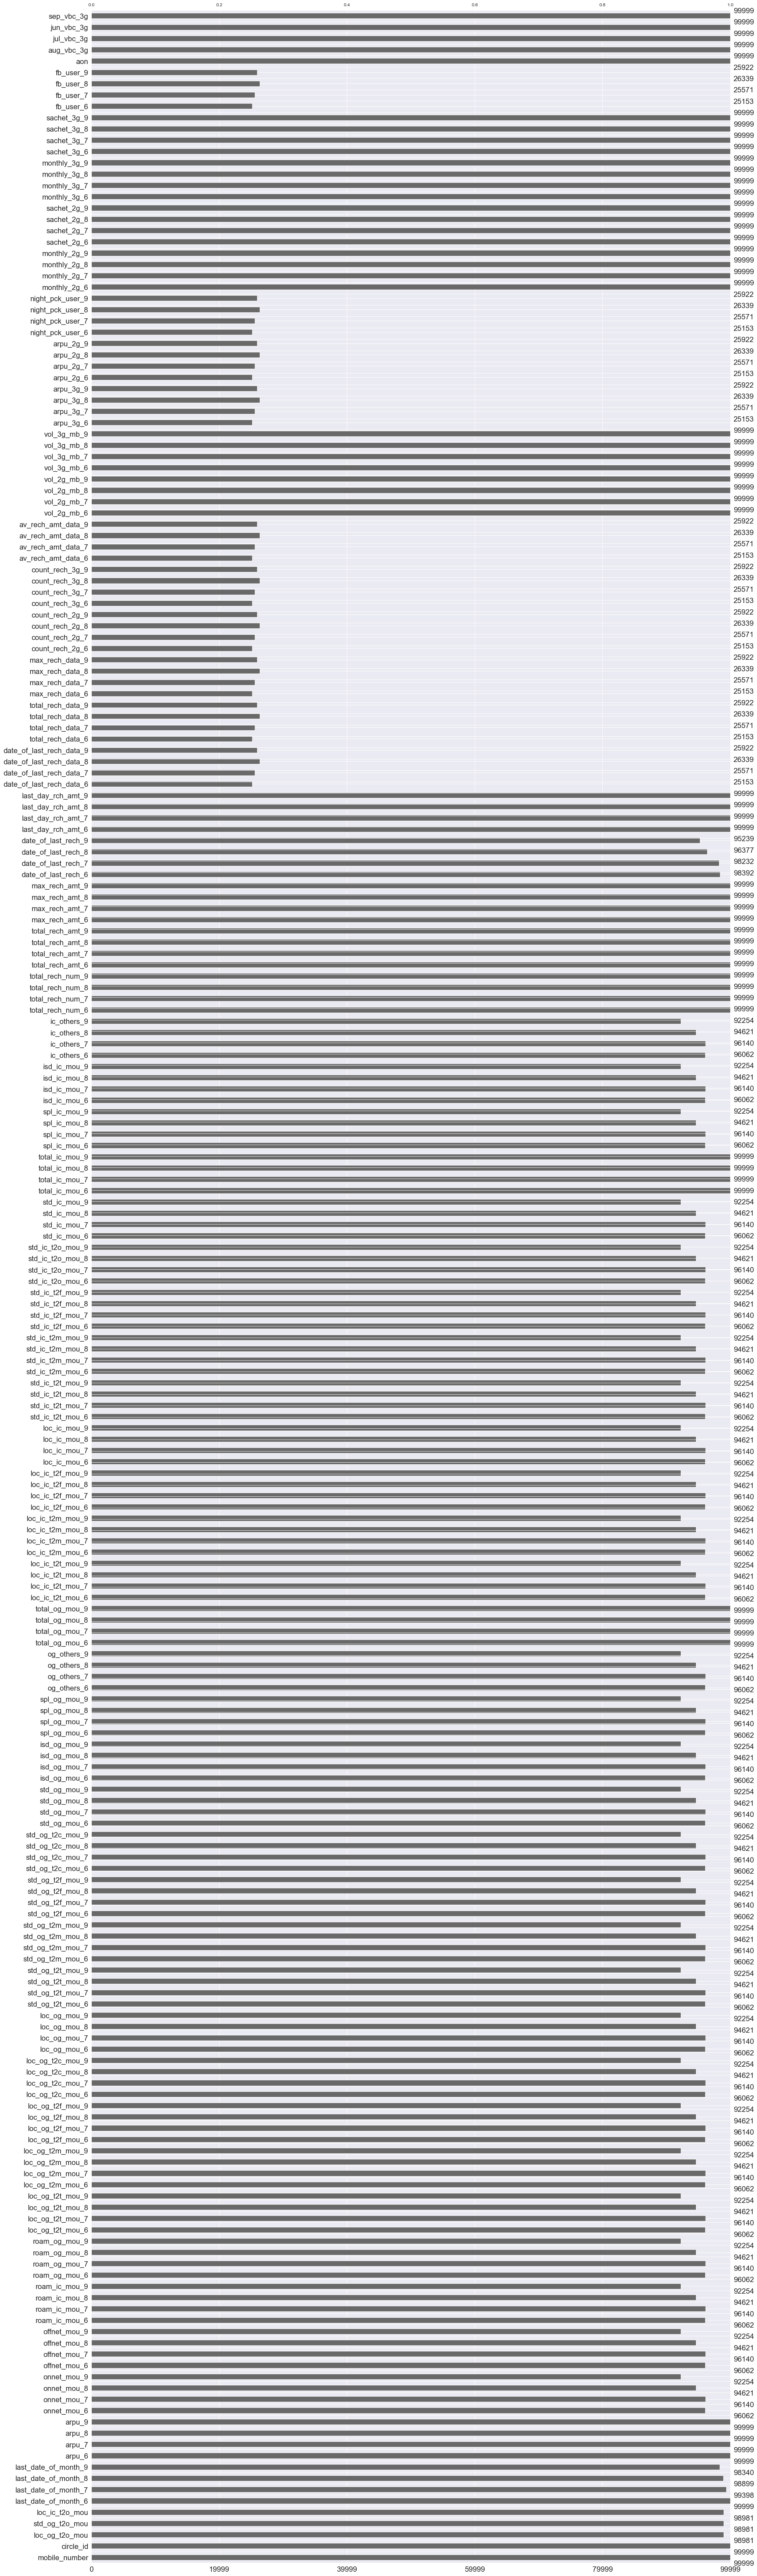

In [89]:
msno.bar(churn_data)
plt.show()

In [90]:
# Let's see the type of each column

churn_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [91]:
# look at missing value ratio in each column
round(churn_data.isnull().mean()*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [93]:
# Lets fill numeric missing values with 0 for now..

numeric_features = [col for col in churn_data.columns if churn_data[col].dtype in ['int64', 'float64']]
categ_features = [col for col in churn_data.columns if churn_data[col].dtype in ['object']]
churn_data[numeric_features] = churn_data[numeric_features].fillna(0) 
print(numeric_features)
print(categ_features)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

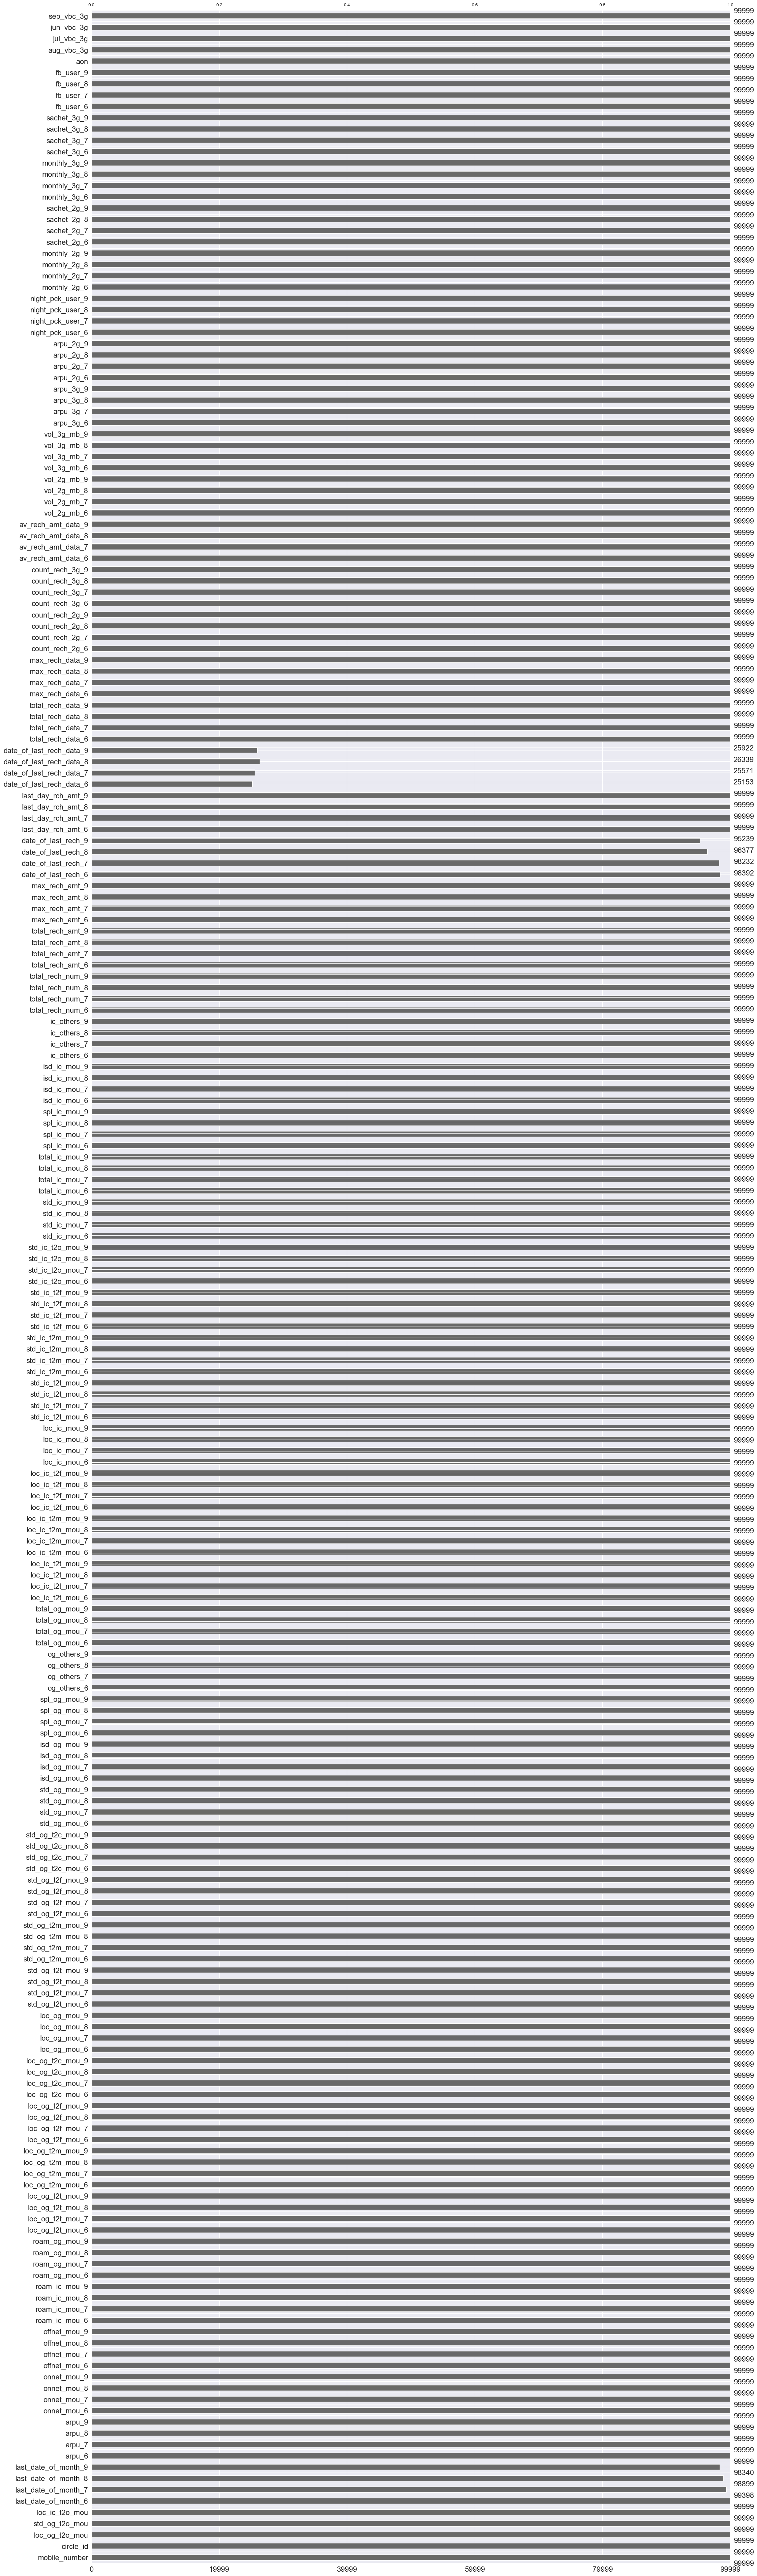

In [94]:
msno.bar(churn_data)
plt.show()

### Feature engineering 
This is useful to come out with the high value customers in the month of June, July and Aug. The one already recharged latest month we no need to check as they are still not in Churn phase.

In [95]:
#lets check total data recharge for month june july and aug

#lets sum up all types of data recharge in the month
churn_data['total_rech_cnt_data_6'] = (churn_data['count_rech_2g_6']+churn_data['count_rech_3g_6']).astype(int)
churn_data['total_rech_cnt_data_7'] = (churn_data['count_rech_2g_7']+churn_data['count_rech_3g_7']).astype(int)
churn_data['total_rech_cnt_data_8'] = (churn_data['count_rech_2g_8']+churn_data['count_rech_3g_8']).astype(int)

In [96]:
# Let's check the total amount recharge

churn_data['total_rech_amt_data_6'] = churn_data['total_rech_cnt_data_6']*churn_data['av_rech_amt_data_6']
churn_data['total_rech_amt_data_7'] = churn_data['total_rech_cnt_data_7']*churn_data['av_rech_amt_data_7']
churn_data['total_rech_amt_data_8'] = churn_data['total_rech_cnt_data_8']*churn_data['av_rech_amt_data_8']

In [97]:
# total monthly spend is based on the total monthly recharge amount for calls and data both
churn_data['total_month_rech_6'] = churn_data['total_rech_amt_6']+churn_data['total_rech_amt_data_6']
churn_data['total_month_rech_7'] = churn_data['total_rech_amt_7']+churn_data['total_rech_amt_data_7']
churn_data['total_month_rech_8'] = churn_data['total_rech_amt_8']+churn_data['total_rech_amt_data_8']

In [98]:
# before dropping unwanted let's check who are high value customers (total monthly recharge) who were there in the month of June and July

cust_hv = churn_data[churn_data[['total_month_rech_6','total_month_rech_7']].mean(axis=1)>churn_data[['total_month_rech_6','total_month_rech_7']].mean(axis=1).quantile(0.7)]

In [99]:
cust_hv.shape

(29953, 235)

In [100]:
cust_hv.isnull().mean()*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.000000
std_og_t2o_mou               0.000000
loc_ic_t2o_mou               0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.090141
last_date_of_month_8         0.550863
last_date_of_month_9         1.218576
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  0.000000
onnet_mou_7                  0.000000
onnet_mou_8                  0.000000
onnet_mou_9                  0.000000
offnet_mou_6                 0.000000
offnet_mou_7                 0.000000
offnet_mou_8                 0.000000
offnet_mou_9                 0.000000
roam_ic_mou_6                0.000000
roam_ic_mou_7                0.000000
roam_ic_mou_8                0.000000
roam_ic_mou_9                0.000000
roam_og_mou_6                0.000000
roam_og_mou_

In [101]:
#now let's decide the churn phase who have not made any calls or recharge during the churn phase.
#total_og_mou_9, total_ic_mou_9, vol_2g_mb_9, vol_3g_mb_9

cols_9 = ['total_og_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
cust_hv['churn'] = cust_hv[cols_9].apply(lambda x:1 if ((x['total_og_mou_9']==0) & (x['total_ic_mou_9']==0) & (x['vol_2g_mb_9']==0) & (x['vol_3g_mb_9']==0)) else 0, axis=1)

In [102]:
print("Total number of customers churned is:",len(cust_hv[cust_hv['churn']==1]))
print("Total number of customers non-churned is:",len(cust_hv[cust_hv['churn']==0]))

Total number of customers churned is: 2433
Total number of customers non-churned is: 27520


In [103]:
#Let's check the Percentage of churned and nonchurned
total_churn_nonchurn = (len(cust_hv[cust_hv['churn']==1]))+ (len(cust_hv[cust_hv['churn']==0]))
churn_percentatge = ((len(cust_hv[cust_hv['churn']==1]))/total_churn_nonchurn)*100

In [104]:
print(total_churn_nonchurn)
print(churn_percentatge)

29953
8.122725603445398


#### Since the churn percentation is only 8% and it looks the data is imbalanced. Hence we have to handle the imbalnced dataset

In [105]:
cols_9_fil = cust_hv.filter(regex=('_9')).columns

cust_hv.drop(cols_9_fil, axis=1, inplace=True)

In [106]:
cust_hv.shape

(29953, 182)

In [107]:
# since we have same value in the circle id we can drop that column too and let's ignore the mobile number for the time being
cust_hv.drop(['circle_id', 'mobile_number'], axis=1, inplace=True)

In [108]:
date_cols = cust_hv.filter(regex=('date')).columns
date_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [109]:
#Since the data type for date columns i object hence let's convert those columns to Datetime type so that will be useful for further operations.

for col in date_cols:
    cust_hv[col]=pd.to_datetime(cust_hv[col], format = '%m/%d/%Y')

In [110]:
cust_hv.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
count         29953.0         29953.0         29953.0                29953   
mean              0.0             0.0             0.0  2014-06-30 00:00:00   
min               0.0             0.0             0.0  2014-06-30 00:00:00   
25%               0.0             0.0             0.0  2014-06-30 00:00:00   
50%               0.0             0.0             0.0  2014-06-30 00:00:00   
75%               0.0             0.0             0.0  2014-06-30 00:00:00   
max               0.0             0.0             0.0  2014-06-30 00:00:00   
std               0.0             0.0             0.0                  NaN   

                last_date_of_month_7           last_date_of_month_8  \
count                          29926                          29788   
mean   2014-07-30 23:59:59.999999744  2014-08-30 23:59:59.999999744   
min              2014-07-31 00:00:00            2014-08-31 00:00:00   
25%              2014-07-31 00:00:00            2014-08-31 00:00:00   
50%              2014-07-31 00:00:00            2014-08-31 00:00:00   
75%              2014-07-31 00:00:00            2014-08-31 00:00:00   
max              2014-07-31 00:00:00            2014-08-31 00:00:00   
std                              NaN                            NaN   

             arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     558.820058    561.160547    508.890301    260.900880    268.051744   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      310.142000    310.071000    231.615000     17.090000     16.040000   
50%      482.354000    481.496000    427.604000     84.640000     82.830000   
75%      700.240000    698.829000    661.753000    290.490000    290.540000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   
std      460.868223    480.028497    502.136278    459.853278    480.303238   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000   29953.000000   
mean     234.345252    373.800402    378.233106    335.123008      16.124001   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       10.440000     71.610000     69.980000     46.760000       0.000000   
50%       65.660000    222.560000    220.040000    182.840000       0.000000   
75%      240.630000    487.910000    494.030000    438.860000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   
std      458.751242    482.712621    499.138982    481.985106      76.344227   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29953.000000   29953.000000   29953.000000   29953.000000   
mean       12.646145      12.512269      26.596033      20.155134   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   
std        75.833558      74.179181     116.274169      96.134144   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29953.000000      29953.000000      29953.000000      29953.000000   
mean       19.889295         84.574122         85.762835         78.153334   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000          4.630000          2.540000   
50%         0.000000         24.360000         24.680000         20.740000   
75%         0.000000         78.060000         78.510000         72.130000   
max      5337.040000       6431.330000       7400.660000      1

In [111]:
#### Based on above statistics we see there are few complete null value columns which are of no use to have them in the dataset.
cols_to_drop = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

cust_hv.drop(columns=cols_to_drop, axis=1, inplace=True)

In [112]:
cust_hv.isnull().mean()*100

last_date_of_month_6         0.000000
last_date_of_month_7         0.090141
last_date_of_month_8         0.550863
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  0.000000
onnet_mou_7                  0.000000
onnet_mou_8                  0.000000
offnet_mou_6                 0.000000
offnet_mou_7                 0.000000
offnet_mou_8                 0.000000
roam_ic_mou_6                0.000000
roam_ic_mou_7                0.000000
roam_ic_mou_8                0.000000
roam_og_mou_6                0.000000
roam_og_mou_7                0.000000
roam_og_mou_8                0.000000
loc_og_t2t_mou_6             0.000000
loc_og_t2t_mou_7             0.000000
loc_og_t2t_mou_8             0.000000
loc_og_t2m_mou_6             0.000000
loc_og_t2m_mou_7             0.000000
loc_og_t2m_mou_8             0.000000
loc_og_t2f_mou_6             0.000000
loc_og_t2f_mou_7             0.000000
loc_og_t2f_m

In [113]:
cust_hv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29953 entries, 0 to 99997
Columns: 171 entries, last_date_of_month_6 to churn
dtypes: datetime64[ns](9), float64(133), int32(3), int64(26)
memory usage: 39.0 MB


In [114]:
numeric_features = [col for col in cust_hv.columns if cust_hv[col].dtype in ['int64', 'float64']]
categ_features = [col for col in cust_hv.columns if cust_hv[col].dtype in ['object']]
date_features = [col for col in cust_hv.columns if cust_hv[col].dtype in ['datetime64[ns]']]
print(numeric_features)
print(categ_features)
print(date_features)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [115]:
#fill the missing date columns with the value before the row value..
for col in date_features:
    cust_hv[col].fillna(method='pad', inplace=True)
# now all the columns are having the values and zero missing values in the dataset

In [116]:
cust_hv.shape

(29953, 171)

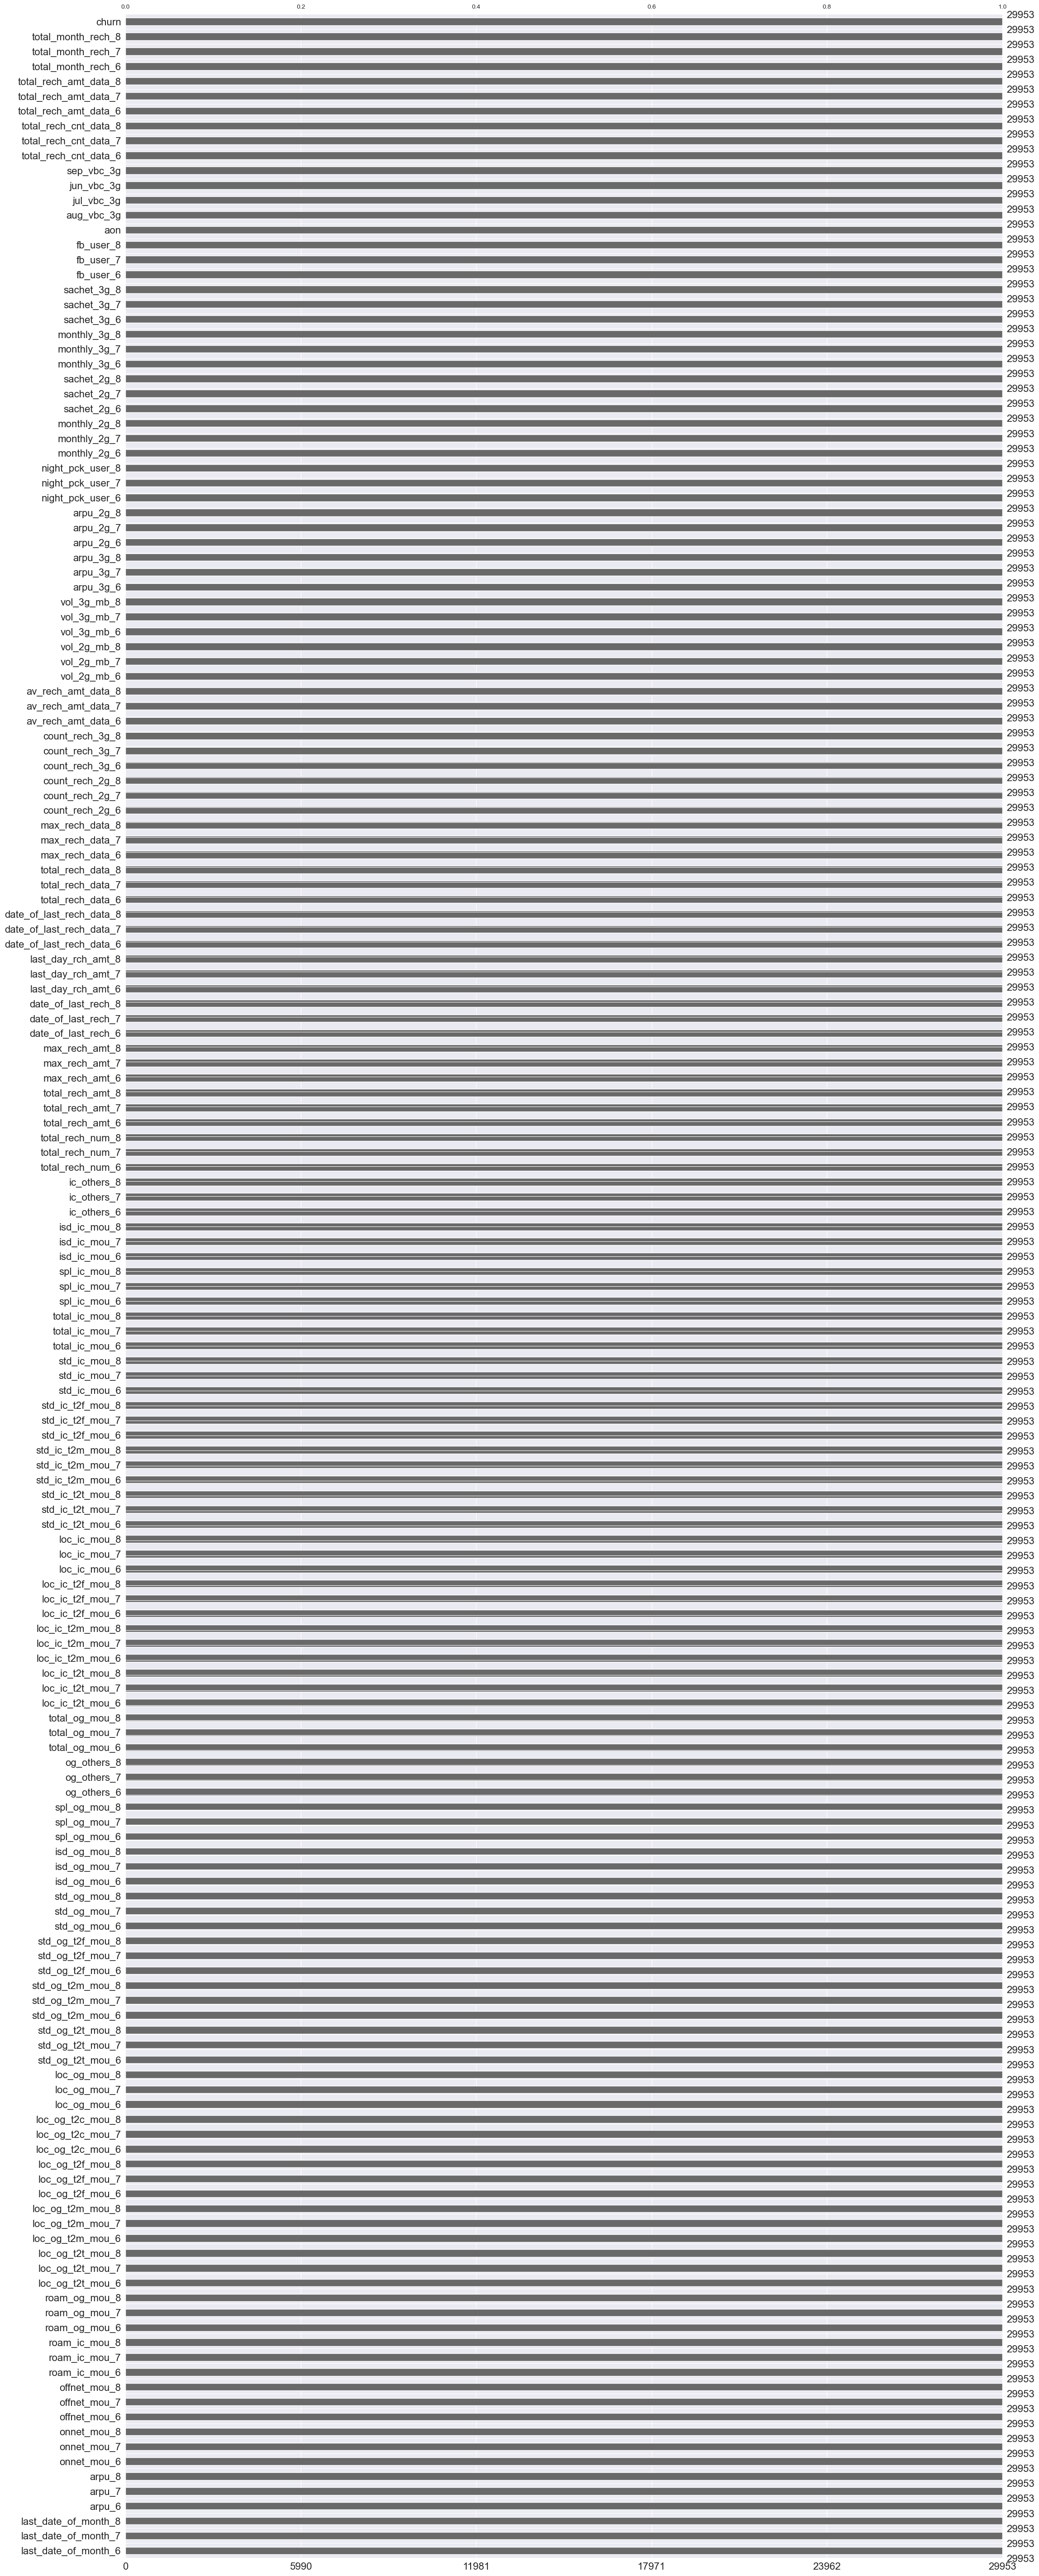

In [117]:
msno.bar(cust_hv)
plt.show()

### Perform EDA

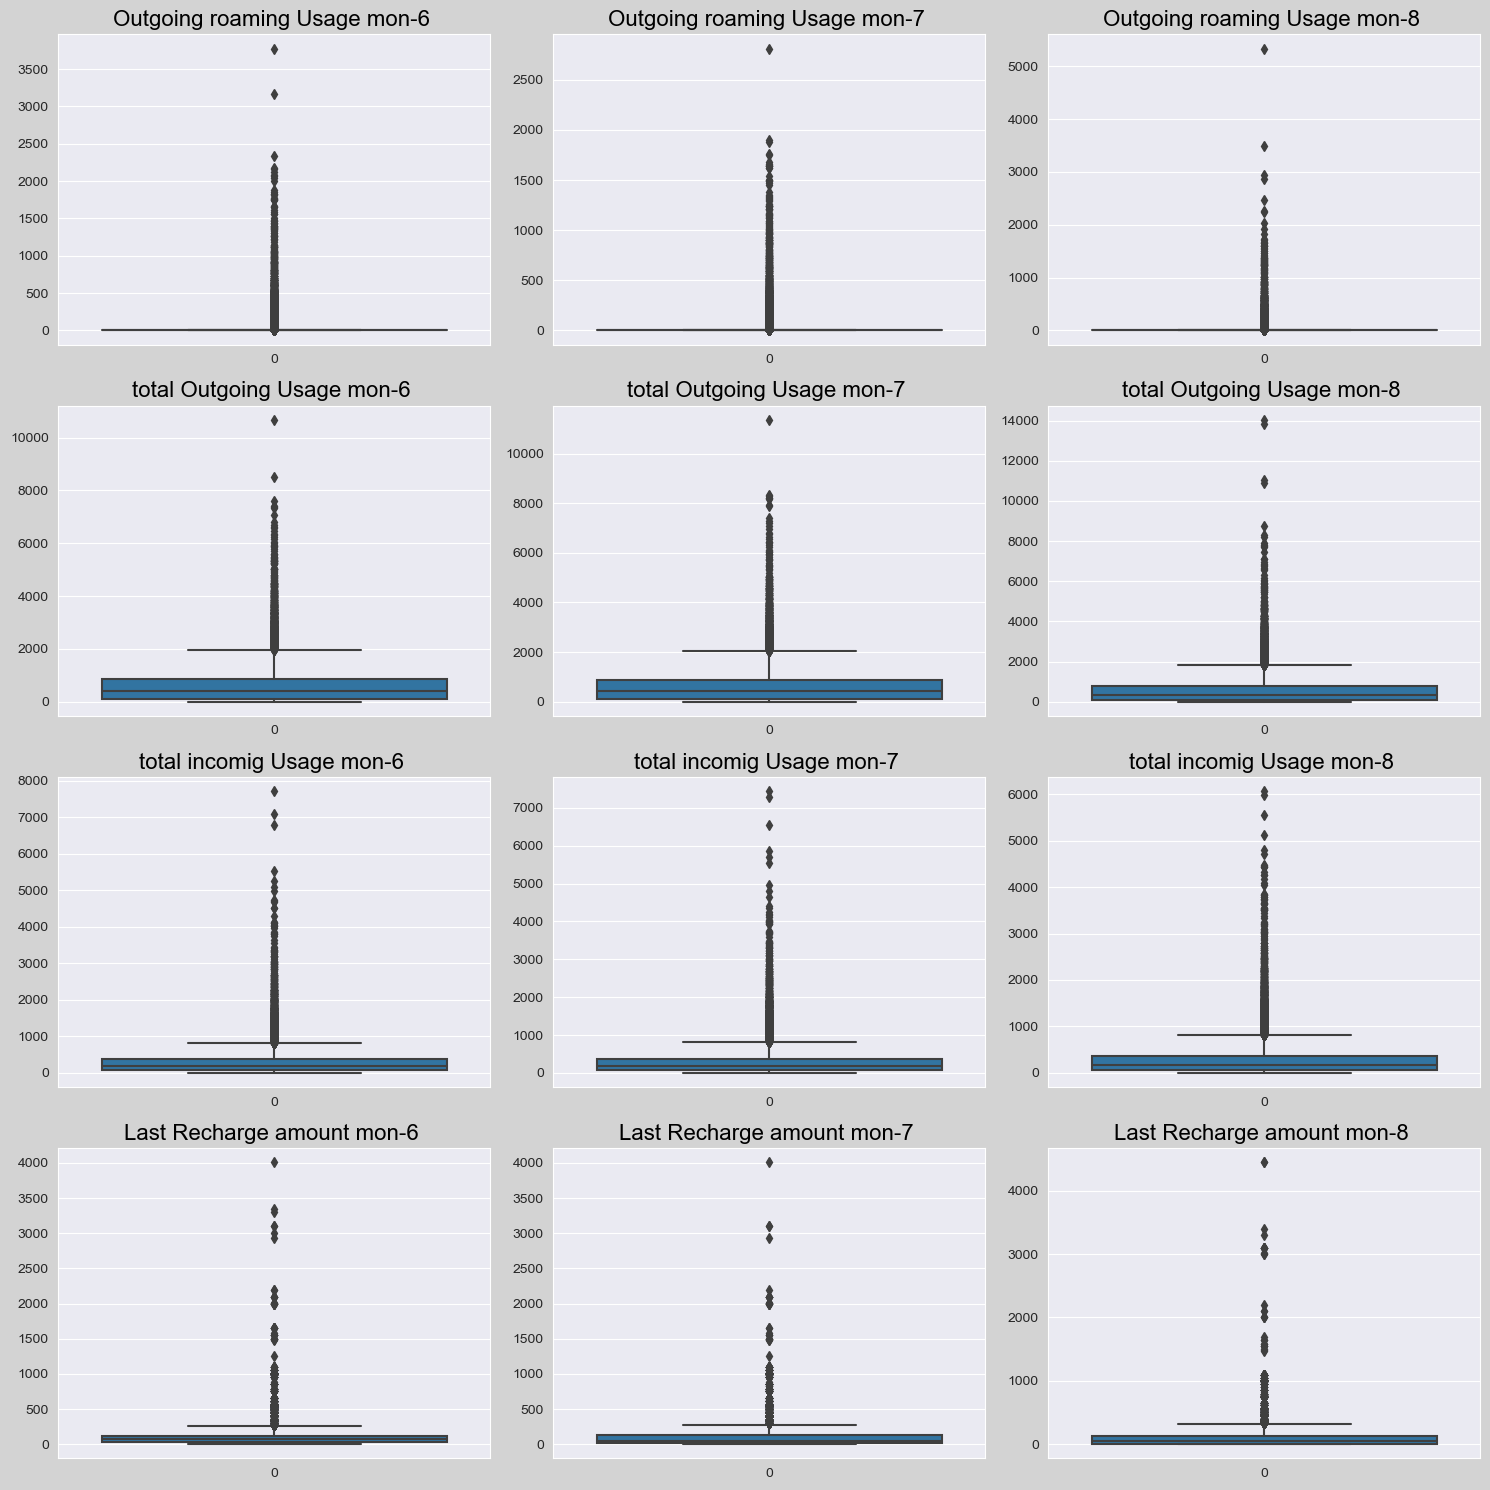

In [118]:
plt.figure(figsize=(15, 15), facecolor='lightgray')
sns.set_style("darkgrid")

# List of columns and corresponding titles
columns = ['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 
           'total_og_mou_6', 'total_og_mou_7','total_og_mou_8',
           'total_ic_mou_6', 'total_ic_mou_7','total_ic_mou_8',
           'last_day_rch_amt_6', 'last_day_rch_amt_7','last_day_rch_amt_8' ]
titles = ['Outgoing roaming Usage mon-6', 'Outgoing roaming Usage mon-7', 'Outgoing roaming Usage mon-8',
          'total Outgoing Usage mon-6', 'total Outgoing Usage mon-7','total Outgoing Usage mon-8',
          'total incomig Usage mon-6', 'total incomig Usage mon-7', 'total incomig Usage mon-8',
          'Last Recharge amount mon-6','Last Recharge amount mon-7','Last Recharge amount mon-8' ]

# Loop through the columns
for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(4, 3, i)
    ax = sns.boxplot(cust_hv[col])
    ax.set_title(f'{title} ', fontsize=16, color='black')

plt.tight_layout()
plt.show()

#### The above box plots shows various observations:

<b>Outgoing Roaming</b>:

    Distribution of roaming usage shows august month usage has reduced

<b>Total outgoing</b>:

    Distribution shows in Auguest month it is reduced

<b>Total incoming</b>:

    Little bit better in August compared to previous months

<b>Last Recharge</b>:

    Shows Customers have reduced the recharge amount
    

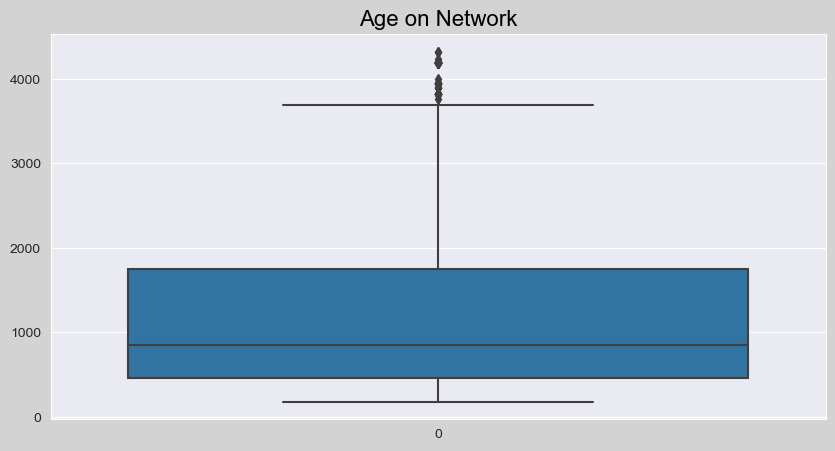

In [119]:
# Let's check customers age on network distribution

plt.figure(figsize=(10,5), facecolor= 'lightgray')
sns.set_style('darkgrid')
ax=sns.boxplot(cust_hv['aon'])
ax.set_title('Age on Network', fontsize=16, color='black' )
plt.show()

In [120]:
# Let's see how the trend for isd and std over the months for June, July and Aug
cust_hv.groupby('churn')[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8',
                          'std_og_mou_6','std_og_mou_7','std_og_mou_8'
                           ]].mean()

isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  std_og_mou_6  std_og_mou_7  \
churn                                                                         
0          1.982700      2.017959      2.014811    324.526938    353.807279   
1          4.350066      3.138952      1.242491    603.007176    481.410875   

       std_og_mou_8  
churn                
0        320.879212  
1        156.169630

In [121]:
# Let's see how the trend for isd and std over the months for June, July and Aug
cust_hv.groupby('churn')[['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8']].mean()

spl_og_mou_6  spl_og_mou_7  spl_og_mou_8
churn                                          
0          5.703977      7.085642      6.889673
1          7.194854      7.345076      2.695898

In [122]:

cust_hv.groupby('churn')[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                          'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'
                           ]].mean()

vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_2g_mb_6  vol_2g_mb_7  \
churn                                                                    
0       350.198817   383.853492   375.182483   127.796845   128.214998   
1       282.056272   220.009203    87.687065   112.114344    90.030806   

       vol_2g_mb_8  
churn               
0       113.180262  
1        23.228874

In [123]:
#Overall incoming and outgoing calls trend
cust_hv.groupby('churn')[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                          'total_og_mou_6','total_og_mou_7','total_og_mou_8'
                           ]].mean()

total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_og_mou_6  \
churn                                                                   
0          295.294077      306.993108      299.218000      593.996050   
1          231.614612      183.280103       63.535134      791.737004   

       total_og_mou_7  total_og_mou_8  
churn                                  
0          628.720470      582.177405  
1          628.765261      209.794521

In [124]:
cust_hv.groupby(['churn'])[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
                          'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']].mean()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
churn                                                                         
0            649.969222        663.889971        613.977871      169.097892   
1            787.330867        627.459104        253.686806      172.178792   

       max_rech_amt_7  max_rech_amt_8  
churn                                  
0          173.397711      166.827398  
1          159.655569       85.536375

#### Observations:
    
    > ISD usage and STD have reduced in Aug month compared to the previous months June and July
    > Special outgoing usage has changed drastically
    > Volumne of usage usage of Data has fallen very steep
    > Total recharge amount compared to the months June and July the month aug is very low.
    > Overall there is high reduction in usage, recharge calls and data in both categories.

In [125]:
df = cust_hv
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29953 entries, 0 to 99997
Columns: 171 entries, last_date_of_month_6 to churn
dtypes: datetime64[ns](9), float64(133), int32(3), int64(26)
memory usage: 40.0 MB


In [126]:
df.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            2014-06-30           2014-07-31           2014-08-31   197.385   
7            2014-06-30           2014-07-31           2014-08-31  1069.180   
8            2014-06-30           2014-07-31           2014-08-31   378.721   
21           2014-06-30           2014-07-31           2014-08-31   514.453   
23           2014-06-30           2014-07-31           2014-08-31    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803         0.00         0.00         0.00          0.00   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00              0.00              0.00              0.00   
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
21             61.79            665.36         

In [127]:
# let's get all date columns we have in the copied dataset
date_cols = list(df.select_dtypes(include=['datetime64[ns]']).columns)
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [128]:
#date columns are not required for us now to do further analysis
df.drop(date_cols, axis=1, inplace=True)

In [129]:
#Let's split the data into train and test 

from sklearn.model_selection import train_test_split
X = df.drop(['churn'], axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 100)

#### We have to scale to standardize the data so that the model will perform well.

In [130]:
#Initialize the scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  #initialize the scalaer 

In [131]:
#Fit and transform the scaler on the train dataset

X_train = scaler.fit_transform(X_train)

#Let's transofrm the test dataset

X_test = scaler.transform(X_test)

#### As seen the previously the data we have imbalance in the target values which have to be handled else the model may not suit for new data.



In [132]:
#lets check the churn and non churn counts
print("Label '1' Cnt:",sum(y_train==1))
print("Label '0' Cnt:",sum(y_train==0))

Label '1' Cnt: 1752
Label '0' Cnt: 19215


#### Now Let's perform the oversampling using "smote"

In [133]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_resam, y_train_resam = sm.fit_resample(X_train, y_train)

In [134]:
#lets print stats after smote
print("Label '1' Cnt:",sum(y_train_resam==1))
print("Label '0' Cnt:",sum(y_train_resam==0))

Label '1' Cnt: 19215
Label '0' Cnt: 19215


In [135]:
# since we have many dimentions we can use PCA for dimensionality reduction.

from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state=42)
pca.fit(X_train_resam)

PCA(random_state=42, svd_solver='randomized')

In [136]:
pca.components_

array([[-4.86175916e-03, -2.26497210e-03,  4.34775736e-04, ...,
         3.21538407e-03,  9.36864743e-03,  5.39730948e-03],
       [-2.72938691e-04,  7.09496244e-03,  1.11130358e-02, ...,
        -4.39003244e-03,  1.09643994e-02,  1.02267803e-02],
       [ 8.56007457e-03, -1.97123979e-03,  5.24585666e-03, ...,
         4.76656430e-03, -9.55938729e-03,  5.74077375e-03],
       ...,
       [ 0.00000000e+00,  9.90784527e-17, -3.07840044e-16, ...,
        -7.28437485e-02,  1.99311955e-02,  3.02743393e-02],
       [-0.00000000e+00,  1.67146305e-16, -1.75097221e-16, ...,
        -3.14462454e-13,  1.63607492e-14,  2.78152728e-14],
       [-0.00000000e+00,  4.43374532e-17, -1.34607952e-17, ...,
         2.82149420e-13,  2.46632644e-13, -1.99697678e-14]])

In [137]:
pca.explained_variance_ratio_

array([5.26134706e-01, 1.19127274e-01, 8.26149417e-02, 4.62746974e-02,
       2.48358854e-02, 2.30663102e-02, 1.88607284e-02, 1.69178012e-02,
       1.43428840e-02, 1.11661218e-02, 8.52495454e-03, 7.63300419e-03,
       7.37360243e-03, 6.04636380e-03, 5.65370877e-03, 4.72912287e-03,
       4.32926837e-03, 3.92091324e-03, 3.71928774e-03, 3.68480253e-03,
       3.46499768e-03, 3.16707747e-03, 2.95752346e-03, 2.87670134e-03,
       2.73134791e-03, 2.47313504e-03, 2.32822912e-03, 2.30878301e-03,
       2.28225084e-03, 2.10288584e-03, 2.03762523e-03, 1.74927548e-03,
       1.63204720e-03, 1.45266608e-03, 1.32187502e-03, 1.29228746e-03,
       1.16317171e-03, 1.13699619e-03, 1.08737951e-03, 1.07566790e-03,
       1.02444785e-03, 9.06225233e-04, 8.00744642e-04, 7.73807442e-04,
       7.36821148e-04, 7.24458813e-04, 6.77376675e-04, 6.54347660e-04,
       6.08937035e-04, 5.93147167e-04, 5.81658450e-04, 5.45327790e-04,
       4.96081134e-04, 4.81962036e-04, 4.80537672e-04, 4.50545406e-04,
      

#### Making a Screeplot for the explained variance to visualize

In [138]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)


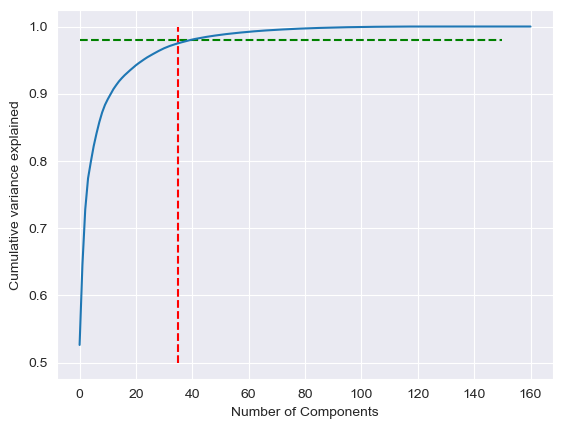

In [139]:
plt.vlines(x=35, ymax=1, ymin=0.5, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative variance explained")
plt.show()

#### Key Observations from above Screeplot:

    > The first 30-40 components capture almost all of the variance (~97% or more).
    > Including too many components beyond this adds little value but increases complexity.
    > Dimensionality reduction: Keeping only the components up to the red line reduces data size while retaining most of the 
        information.

In [140]:
#Let's perform PCA with these components

from sklearn.decomposition import IncrementalPCA

In [141]:
pca_final = IncrementalPCA(n_components=35)
X_train_pca = pca_final.fit_transform(X_train_resam)
X_train_pca.shape

(38430, 35)

In [142]:
# Let's check the correlation matrix
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(35, 35)

<Axes: >

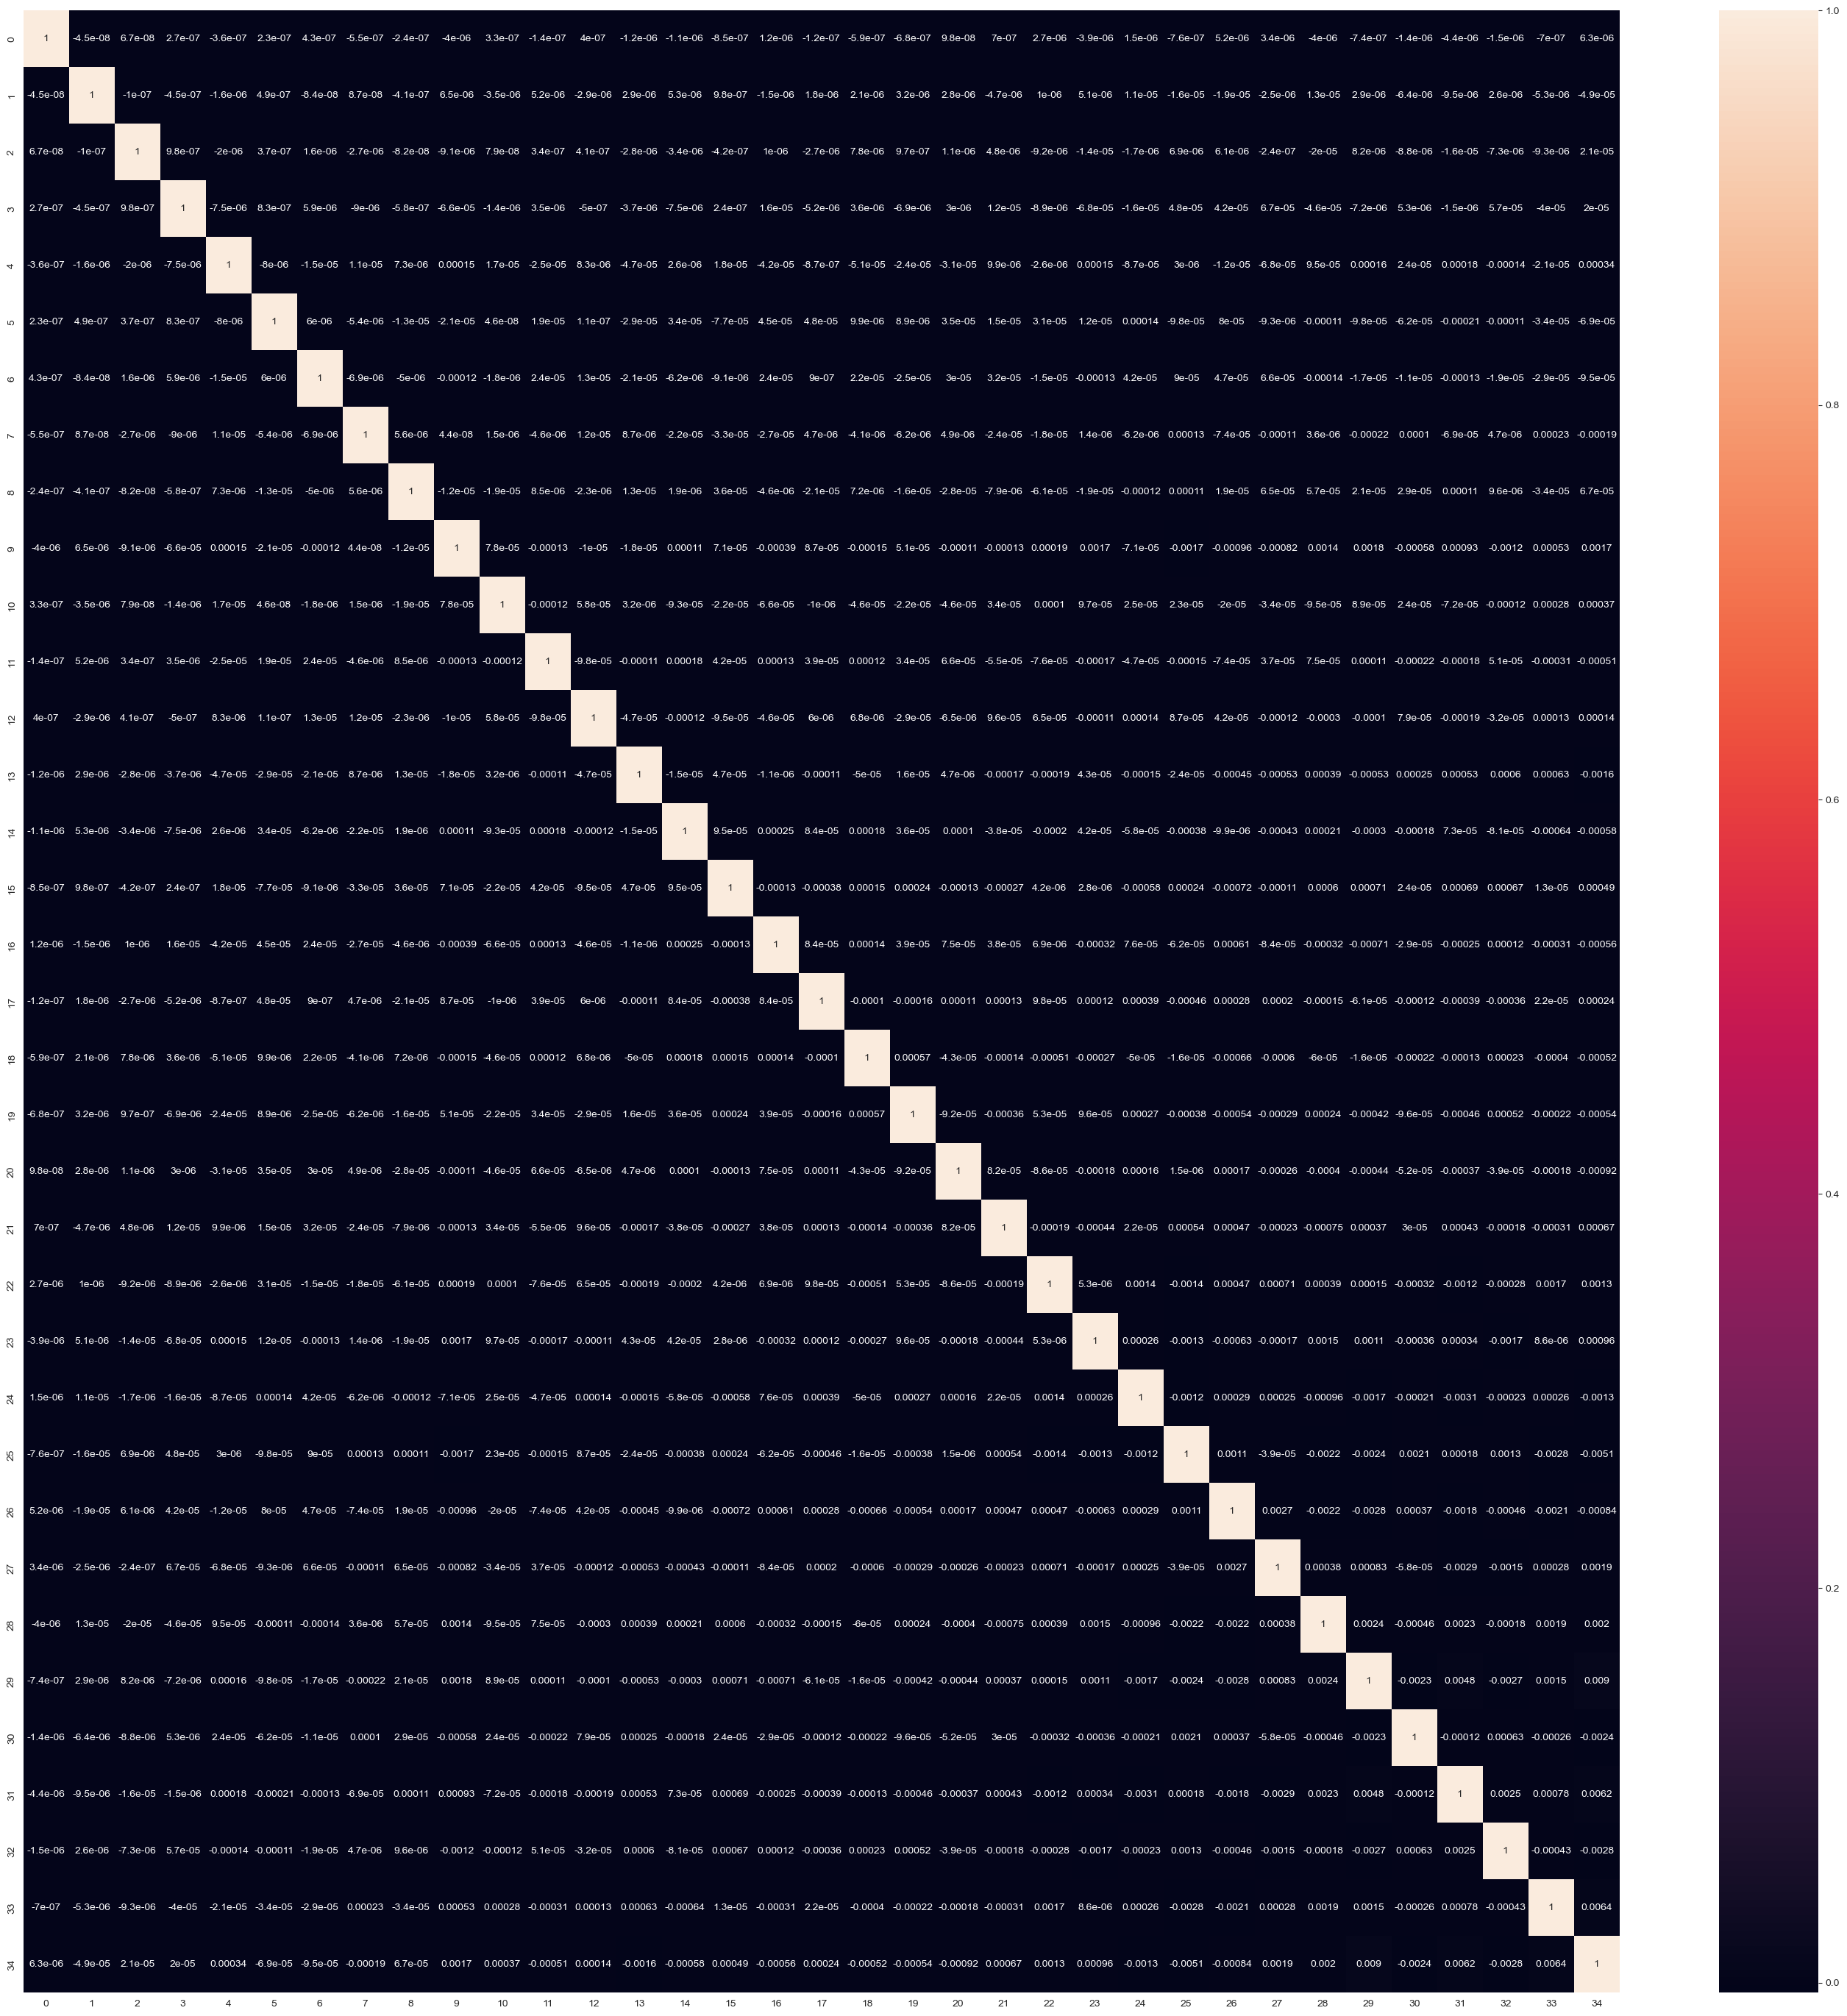

In [143]:
plt.figure(figsize=[35,35])
sns.heatmap(corrmat, annot=True)

In [144]:
#correlations seem close to 0
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.008982753025420951 , min corr:  -0.005080873133438163


In [145]:
#Let's apply these components on test data

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8986, 35)

### Let's apply logistic regression on top of the data of our Principal components

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
learner_pca = LogisticRegression(class_weight='balanced')

In [148]:
model_pca = learner_pca.fit(X_train_pca, y_train_resam)

#### Prediction for the train Dataset

In [149]:
#Predict on Train set
train_prediction = model_pca.predict(X_train_pca)
#finding prediction probabilities
pred_probs_train = model_pca.predict_proba(X_train_pca)[:,1]

In [150]:
#lets validate some scores
print ("Accuracy :",metrics.roc_auc_score(y_train_resam, train_prediction))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_resam, train_prediction))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_resam, pred_probs_train))

Accuracy : 0.8352328909705959
Recall/Sensitivity : 0.8539682539682539
AUC Score (Train): 0.9060898637377054


#### Prediction for the Test dataset

In [151]:
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix
)

# Predict on test dataset
pred_probs_test = model_pca.predict(X_test_pca)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, pred_probs_test)
TN, FP, FN, TP = conf_matrix.ravel()

# Compute evaluation metrics
roc_auc = roc_auc_score(y_test, pred_probs_test)
precision = precision_score(y_test, pred_probs_test)
recall = recall_score(y_test, pred_probs_test)  # Sensitivity
specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)
positive_predictive_value = TP / (TP + FP)
negative_predictive_value = TN / (TN + FN)
accuracy = accuracy_score(y_test, pred_probs_test)

# Print results
print(f"ROC AUC Score                                    : {roc_auc:.4f}")
print(f"Precision Score (Positive Predictive Value)      : {precision:.4f}")
print(f"Sensitivity/Recall                       : {recall:.4f}")
print(f"Specificity          : {specificity:.4f}")
print(f"False Positive Rate  : {false_positive_rate:.4f}")
print(f"Negative Predictive Value : {negative_predictive_value:.4f}")
print(f"Accuracy             : {accuracy:.4f}")

ROC AUC Score         : 0.8201
Precision Score (Positive Predictive Value)      : 0.2619
Sensitivity/Recall    : 0.8326
Specificity          : 0.8076
False Positive Rate  : 0.1924
Negative Predictive Value : 0.9833
Accuracy             : 0.8095


In [152]:
# Get probability predictions
y_train_pred = model_pca.predict_proba(X_train_pca)[:, 1]  # Probability of class 1

# Create DataFrame with actual and predicted values
y_train_pred_final = pd.DataFrame({
    'Churn': y_train_resam, 
    'Churn_Prob': y_train_pred,
    'Predicted': (y_train_pred > 0.5).astype(int)  # Convert probability to binary class
})

# Display first few rows
y_train_pred_final.head()

Churn  Churn_Prob  Predicted
0      0    0.143870          0
1      0    0.875288          1
2      0    0.215354          0
3      0    0.108695          0
4      0    0.061180          0

#### Let's create ROC curve

In [153]:
def draw_roc(actual, probs):
    """Draws an ROC curve given the actual labels and predicted probabilities."""
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    # Plot the ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='b')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Diagonal line

    # Labels and aesthetics
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

    # Show the plot
    plt.show()

In [154]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

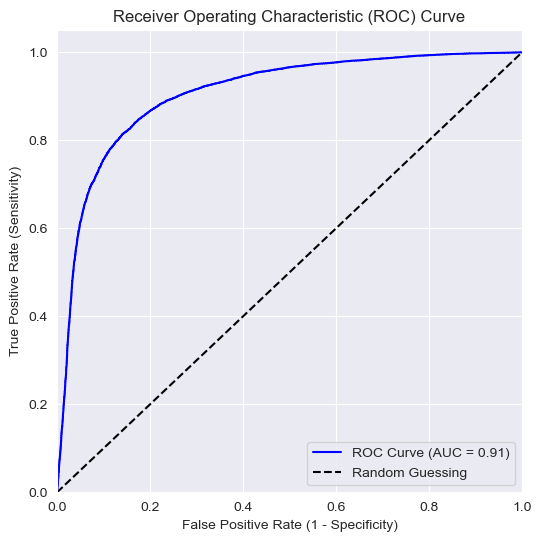

In [155]:
#lets draw roc curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [156]:
# Create probability cutoff columns dynamically
cutoffs = [round(x/10, 1) for x in range(10)]  # Generate cutoffs from 0.0 to 0.9

for cutoff in cutoffs:
    y_train_pred_final[f'Pred_{cutoff}'] = y_train_pred_final['Churn_Prob'].apply(lambda x: 1 if x > cutoff else 0)

# Display the first few rows
y_train_pred_final.head()

Churn  Churn_Prob  Predicted  Pred_0.0  Pred_0.1  Pred_0.2  Pred_0.3  \
0      0    0.143870          0         1         1         0         0   
1      0    0.875288          1         1         1         1         1   
2      0    0.215354          0         1         1         1         0   
3      0    0.108695          0         1         1         0         0   
4      0    0.061180          0         1         0         0         0   

   Pred_0.4  Pred_0.5  Pred_0.6  Pred_0.7  Pred_0.8  Pred_0.9  
0         0         0         0         0         0         0  
1         1         1         1         1         1         0  
2         0         0         0         0         0         0  
3         0         0         0         0         0         0  
4         0         0         0         0         0         0

In [157]:
# here we are deriving the accuracy, sensitivity and specificity for the predicted probability

from sklearn.metrics import confusion_matrix

# Initialize an empty DataFrame
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

# Probability cutoffs
cutoffs = [round(x,2) for x in np.arange(0.0, 1.0, 0.1)]  # Generates values from 0.0 to 0.9 in steps of 0.1

# Compute metrics for each cutoff
for i in cutoffs:
    cm = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[f'Pred_{i}'])
    TN, FP, FN, TP = cm.ravel()  # Extract values directly

    # Calculate accuracy, sensitivity (recall), and specificity
    accuracy = (TP + TN) / cm.sum()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  # Avoid division by zero
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # Avoid division by zero

    # Append to DataFrame
    cutoff_df.loc[len(cutoff_df)] = [i, accuracy, sensitivity, specificity]

# Display results
print(cutoff_df)

   prob  accuracy  sensitivity  specificity
0   0.0  0.500000     1.000000     0.000000
1   0.1  0.683971     0.978402     0.389539
2   0.2  0.752329     0.957897     0.546760
3   0.3  0.794900     0.928806     0.660994
4   0.4  0.822196     0.897008     0.747385
5   0.5  0.835233     0.853968     0.816498
6   0.6  0.835181     0.796409     0.873953
7   0.7  0.816992     0.716315     0.917668
8   0.8  0.780822     0.610825     0.950820
9   0.9  0.599480     0.214520     0.984439


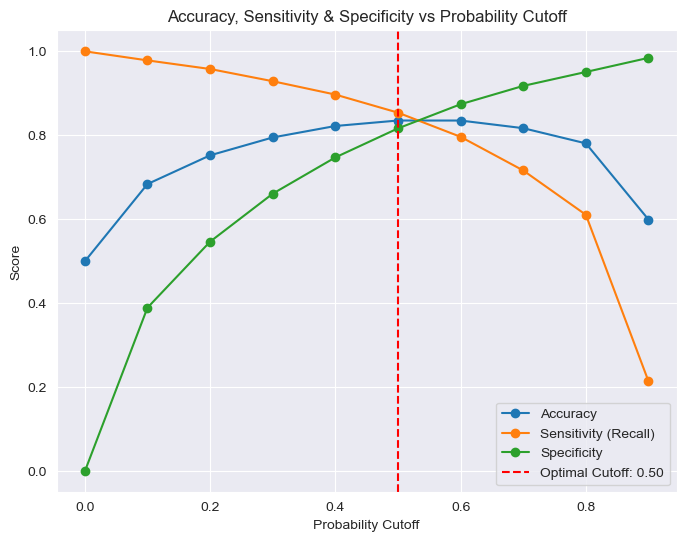

Optimal Probability Cutoff: 0.50


In [158]:
# Find the optimal cutoff using Youden’s Index
cutoff_df['youden_index'] = cutoff_df['sensitivity'] + cutoff_df['specificity'] - 1
optimal_cutoff = cutoff_df.loc[cutoff_df['youden_index'].idxmax(), 'prob']

# Plot the curves
plt.figure(figsize=(8, 6))
plt.plot(cutoff_df['prob'], cutoff_df['accuracy'], label="Accuracy", marker="o")
plt.plot(cutoff_df['prob'], cutoff_df['sensitivity'], label="Sensitivity (Recall)", marker="o")
plt.plot(cutoff_df['prob'], cutoff_df['specificity'], label="Specificity", marker="o")

# Highlight the optimal cutoff point
plt.axvline(optimal_cutoff, color='red', linestyle='--', label=f'Optimal Cutoff: {optimal_cutoff:.2f}')

# Labels & Legend
plt.xlabel("Probability Cutoff")
plt.ylabel("Score")
plt.title("Accuracy, Sensitivity & Specificity vs Probability Cutoff")
plt.legend()
plt.grid(True)
plt.show()

# Print optimal probability cutoff
print(f"Optimal Probability Cutoff: {optimal_cutoff:.2f}")

In [159]:
optimal_cutoff = cutoff_df.loc[cutoff_df['youden_index'].idxmax(), 'prob']
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > optimal_cutoff else 0)
y_train_pred_final.head()

Churn  Churn_Prob  Predicted  Pred_0.0  Pred_0.1  Pred_0.2  Pred_0.3  \
0      0    0.143870          0         1         1         0         0   
1      0    0.875288          1         1         1         1         1   
2      0    0.215354          0         1         1         1         0   
3      0    0.108695          0         1         1         0         0   
4      0    0.061180          0         1         0         0         0   

   Pred_0.4  Pred_0.5  Pred_0.6  Pred_0.7  Pred_0.8  Pred_0.9  final_predicted  
0         0         0         0         0         0         0                0  
1         1         1         1         1         1         0                1  
2         0         0         0         0         0         0                0  
3         0         0         0         0         0         0                0  
4         0         0         0         0         0         0                0

In [160]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_resam, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
#y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
optimal_cutoff = cutoff_df.loc[cutoff_df['youden_index'].idxmax(), 'prob']
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > optimal_cutoff else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.143870          0
1      0    0.875288          1
2      0    0.215354          0
3      0    0.108695          0
4      0    0.061180          0

In [161]:
#Let's find out the scores for the train dataset

# Compute confusion matrix
confusion = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['predicted'])
TN, FP, FN, TP = confusion.ravel()  # Unpack values

# Compute and print scores
print("ROC AUC Score:", roc_auc_score(y_train_pred_final['Churn'], y_train_pred_final['predicted']))
print("Precision Score:", precision_score(y_train_pred_final['Churn'], y_train_pred_final['predicted']))
print("Sensitivity/Recall:", recall_score(y_train_pred_final['Churn'], y_train_pred_final['predicted']))
print("Specificity:", TN / (TN + FP))
print("False Positive Rate:", FP / (TN + FP))
print("Positive Predictive Value (PPV):", TP / (TP + FP))
print("Negative Predictive Value (NPV):", TN / (TN + FN))

ROC AUC Score: 0.8352328909705959
Precision Score: 0.8231251567594683
Sensitivity/Recall: 0.8539682539682539
Specificity: 0.8164975279729378
False Positive Rate: 0.18350247202706219
Positive Predictive Value (PPV): 0.8231251567594683
Negative Predictive Value (NPV): 0.8482833198161666


In [162]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = model_pca.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
48388      0    0.121754          0
29754      0    0.014212          0
50131      0    0.053967          0
66630      0    0.173336          0
91920      0    0.199507          0

In [163]:
#Let's check the scores on the test dataset

from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['predicted'])
TN, FP, FN, TP = conf_matrix.ravel()  # Unpack values

# Compute and print scores
print("ROC AUC Score:", roc_auc_score(y_test_pred_final['Churn'], y_test_pred_final['predicted']))
print("Precision Score:", precision_score(y_test_pred_final['Churn'], y_test_pred_final['predicted']))
print("Sensitivity/Recall:", recall_score(y_test_pred_final['Churn'], y_test_pred_final['predicted']))
print("Specificity:", TN / (TN + FP))
print("False Positive Rate:", FP / (TN + FP))
print("Positive Predictive Value (PPV):", TP / (TP + FP))
print("Negative Predictive Value (NPV):", TN / (TN + FN))

ROC AUC Score: 0.8166683021833706
Precision Score: 0.23962186600904234
Sensitivity/Recall: 0.856093979441997
Specificity: 0.7772426249247442
False Positive Rate: 0.22275737507525586
Positive Predictive Value (PPV): 0.23962186600904234
Negative Predictive Value (NPV): 0.9850450175492141


### Based on the above statistics:

#### Train Dataset:
    > Sensitivity/Recall: 0.8539682539682539
    > Specificity: 0.8164975279729378 

#### Test Dataset:

    > Sensitivity/Recall: 0.856093979441997
    > Specificity: 0.7772426249247442




### Random forest model evaluation

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    #'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 15, 20, 25]  # Depth of the trees
    #'min_samples_split': [2, 5, 10],  # Min samples to split a node
    #'min_samples_leaf': [1, 2, 4]  # Min samples at leaf node
}

# Instantiate the model with a random state for reproducibility
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring="accuracy",
    n_jobs=-1, verbose=1, return_train_score=True
)

# Fit the model
grid_search.fit(X_train_pca, y_train_resam)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'max_depth': 25}


In [167]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      29.451585      1.710209         0.157244        0.019076   
1      37.502813      1.206364         0.209675        0.010927   
2      39.941722      1.279888         0.202155        0.011925   
3      39.341922      0.366858         0.198902        0.018356   

  param_max_depth             params  split0_test_score  split1_test_score  \
0              10  {'max_depth': 10}           0.885506           0.888629   
1              15  {'max_depth': 15}           0.934556           0.934556   
2              20  {'max_depth': 20}           0.943794           0.946006   
3              25  {'max_depth': 25}           0.945095           0.948868   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.896956           0.887458           0.887718         0.889253   
1           0.938329           0.933125           0.929092         0.933932   
2           0.947957           0.947827           0.942493         0.945615   
3           0.950039           0.950690           0.943404         0.947619   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003983                4            0.919594            0.918260   
1        0.002973                3            0.979606            0.979378   
2        0.002172                2            0.991218            0.991706   
3        0.002863                1            0.997008            0.996682   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.918488            0.918358            0.917447   
1            0.978825            0.978955            0.978793   
2            0.991706            0.992096            0.992259   
3            0.998244            0.997105            0.997495   

   mean_train_score  std_train_score  
0          0.918430         0.000687  
1          0.979111         0.000324  
2          0.991797         0.000362  
3          0.997307         0.000535

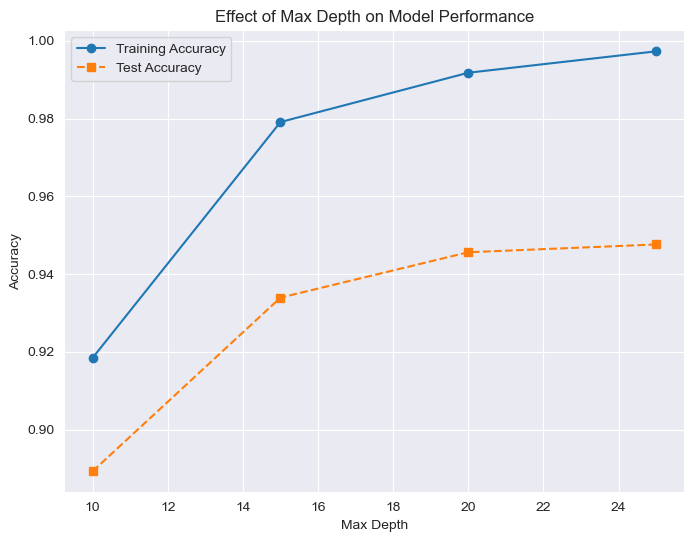

In [168]:
# Extract results from grid_search
scores = pd.DataFrame(grid_search.cv_results_)

# Plot training and test accuracy
plt.figure(figsize=(8, 6))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], marker='o', linestyle='-', 
         label="Training Accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], marker='s', linestyle='--', 
         label="Test Accuracy")

# Labels and title
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Max Depth on Model Performance")
plt.legend()
plt.grid(True)
plt.show()

#### The above graph explains:
    
    Max Depth ~15-20 is optimal → Test accuracy is high, and overfitting is not extreme.
    Max Depth >20 shows overfitting → Training accuracy is near 100%, but test accuracy is stable.
    Max Depth = 10 is too low → The model underfits, as both train and test accuracy are low.


<b>Actionable Insight</b>:

    Choose max_depth = 15-20 for a good balance between learning and generalization.
    
Based on this further tuning may be required to ensure improve the model accureacy.

In [169]:
#Let's try with n estimators parameter.

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200]  # Number of trees in the forest
    #'max_depth': [10, 15, 20, 25]  # Depth of the trees
    #'min_samples_split': [2, 5, 10],  # Min samples to split a node
    #'min_samples_leaf': [1, 2, 4]  # Min samples at leaf node
}

# Instantiate the model with a random state for reproducibility
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring="accuracy",
    n_jobs=-1, verbose=1, return_train_score=True
)

# Fit the model
grid_search.fit(X_train_pca, y_train_resam)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 200}


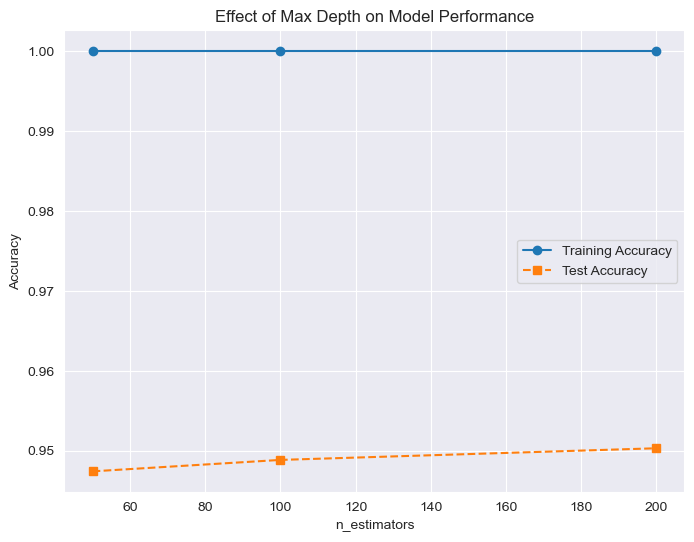

In [171]:
# Extract results from grid_search
scores = pd.DataFrame(grid_search.cv_results_)

# Plot training and test accuracy
plt.figure(figsize=(8, 6))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], marker='o', linestyle='-', 
         label="Training Accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], marker='s', linestyle='--', 
         label="Test Accuracy")

# Labels and title
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Effect of Max Depth on Model Performance")
plt.legend()
plt.grid(True)
plt.show()

#### More trees generally lead to a better and more stable model, but after a certain point, the improvement plateaus. If we check the above graph the raining accuracy is constant looks like 100% and is clear sign of overfitting. However the test accuracy plateus after ~100 trees.

In [174]:
#Let's try with min sample split parameter.

# Define the hyperparameter grid
param_grid = {
    #'n_estimators': [50, 100, 200]  # Number of trees in the forest
    #'max_depth': [10, 15, 20, 25]  # Depth of the trees
    'min_samples_split': [50,100,150]  # Min samples to split a node
    #'min_samples_leaf': [1, 2, 4]  # Min samples at leaf node
}

# Instantiate the model with a random state for reproducibility
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring="accuracy",
    n_jobs=-1, verbose=1, return_train_score=True
)

# Fit the model
grid_search.fit(X_train_pca, y_train_resam)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'min_samples_split': 50}


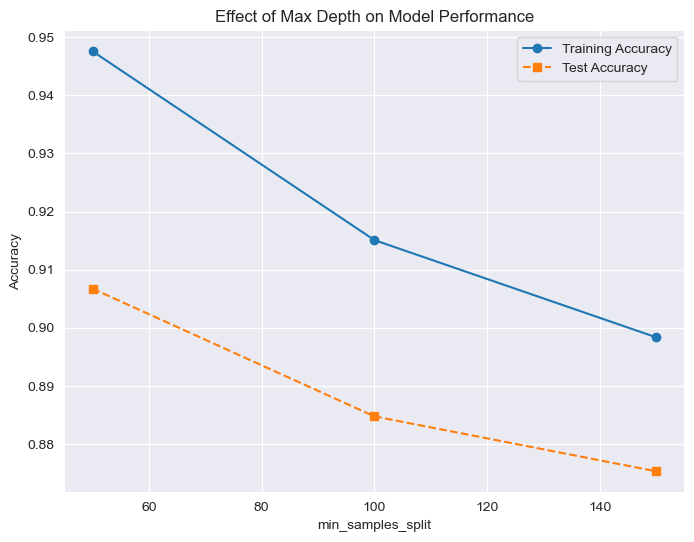

In [175]:
# Extract results from grid_search
scores = pd.DataFrame(grid_search.cv_results_)

# Plot training and test accuracy
plt.figure(figsize=(8, 6))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], marker='o', linestyle='-', 
         label="Training Accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], marker='s', linestyle='--', 
         label="Test Accuracy")

# Labels and title
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Effect of Max Depth on Model Performance")
plt.legend()
plt.grid(True)
plt.show()

### Training accuracy is reducing as to overfitting also. The graph shows it is better to consider the samples between 50 to 100

In [176]:

# Now let's check with the hyper parameter min sample leafs
# Define the hyperparameter grid
param_grid = {
    #'n_estimators': [50, 100, 200],  # Number of trees in the forest
    #'max_depth': [10, 15, 20, 25]  # Depth of the trees
    #'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [15,30,45,50,65,80,100]  # Min samples at leaf node
}

# Instantiate the model with a random state for reproducibility
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring="accuracy",
    n_jobs=-1, verbose=1, return_train_score=True
)

# Fit the model
grid_search.fit(X_train_pca, y_train_resam)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'min_samples_leaf': 15}


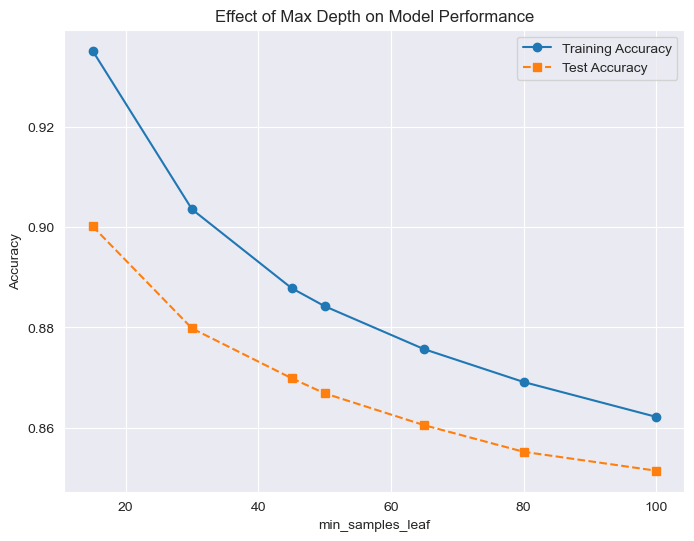

In [177]:
# Extract results from grid_search
scores = pd.DataFrame(grid_search.cv_results_)

# Plot training and test accuracy
plt.figure(figsize=(8, 6))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], marker='o', linestyle='-', 
         label="Training Accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], marker='s', linestyle='--', 
         label="Test Accuracy")

# Labels and title
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Effect of Max Depth on Model Performance")
plt.legend()
plt.grid(True)
plt.show()

#### Based on the above graph it shows that min sample leafs are optimal between 20 to 50

In [180]:
# Let's fit the mode with the best parameters gained from the above fitting.

# Initialize the Random Forest model with optimized parameters
rfc = RandomForestClassifier(
    bootstrap=True,
    max_depth=20,
    min_samples_leaf=50, 
    min_samples_split=50,
    max_features=5,
    n_estimators=100,
    random_state=10,
    n_jobs=-1  # Enables parallel computation for faster training
)

# Fit the model
rf_pca = rfc.fit(X_train_pca, y_train_resam)

# Make predictions
rtrain_predictions = rf_pca.predict(X_train_pca)
rtrain_predprob = rf_pca.predict_proba(X_train_pca)[:, 1]

# Print performance metrics
accuracy = roc_auc_score(y_train_resam, rtrain_predictions)
recall = recall_score(y_train_resam, rtrain_predictions)
auc_score = roc_auc_score(y_train_resam, rtrain_predprob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall/Sensitivity: {recall:.4f}")
print(f"AUC Score (Train): {auc_score:.4f}")


Accuracy: 0.8887
Recall/Sensitivity: 0.8868
AUC Score (Train): 0.9589


In [183]:
# Compute confusion matrix

pred_prob_test = rf_pca.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, pred_prob_test)
TN, FP, FN, TP = conf_matrix.ravel()  # Unpack values

# Compute and print scores
print("ROC AUC Score:", roc_auc_score(y_test_pred_final['Churn'], y_test_pred_final['predicted']))
print("Precision Score:", precision_score(y_test_pred_final['Churn'], y_test_pred_final['predicted']))
print("Sensitivity/Recall:", recall_score(y_test_pred_final['Churn'], y_test_pred_final['predicted']))
print("Specificity:", TN / (TN + FP))
print("False Positive Rate:", FP / (TN + FP))
print("Positive Predictive Value (PPV):", TP / (TP + FP))
print("Negative Predictive Value (NPV):", TN / (TN + FN))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_prob_test)))

ROC AUC Score: 0.8166683021833706
Precision Score: 0.23962186600904234
Sensitivity/Recall: 0.856093979441997
Specificity: 0.8693558097531607
False Positive Rate: 0.13064419024683926
Positive Predictive Value (PPV): 0.3201754385964912
Negative Predictive Value (NPV): 0.9769959404600812
Accuracy : 0.8603383040284888


In [184]:
#lets check with probability cutoff 0.5
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_resam, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

Churn  Churn_Prob  predicted
0      0    0.188897          0
1      0    0.806197          1
2      0    0.178355          0
3      0    0.207971          0
4      0    0.096927          0

In [185]:
# Create probability cutoff columns dynamically
cutoffs = [round(x/10, 1) for x in range(10)]  # Generate cutoffs from 0.0 to 0.9

for cutoff in cutoffs:
    y_train_predrf_final[f'Pred_{cutoff}'] = y_train_predrf_final['Churn_Prob'].apply(lambda x: 1 if x > cutoff else 0)

# Display the first few rows
y_train_predrf_final.head()

Churn  Churn_Prob  predicted  Pred_0.0  Pred_0.1  Pred_0.2  Pred_0.3  \
0      0    0.188897          0         1         1         0         0   
1      0    0.806197          1         1         1         1         1   
2      0    0.178355          0         1         1         0         0   
3      0    0.207971          0         1         1         1         0   
4      0    0.096927          0         1         0         0         0   

   Pred_0.4  Pred_0.5  Pred_0.6  Pred_0.7  Pred_0.8  Pred_0.9  
0         0         0         0         0         0         0  
1         1         1         1         1         1         0  
2         0         0         0         0         0         0  
3         0         0         0         0         0         0  
4         0         0         0         0         0         0

In [190]:
#calculate the metrics for the vairous cutoff of randomforest variables

# Generate probability cutoffs (0.0 to 0.9)
cutoffs = [round(x / 10, 1) for x in range(10)]  

# Ensure column exists
if 'Churn_Prob' not in y_train_predrf_final.columns:
    raise ValueError("Column 'Churn_Prob' is missing. Check your dataset!")

# Create probability cutoff columns dynamically
for cutoff in cutoffs:
    col_name = f'Pred_{cutoff}'
    y_train_predrf_final[col_name] = (y_train_predrf_final['Churn_Prob'] >= cutoff).astype(int)

# Create an empty DataFrame for evaluation
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

# Iterate through probability thresholds
for prob in cutoffs:  # Use `cutoffs` instead of `np.arange(0, 1, 0.1)`
    col_name = f'Pred_{prob}'  # Ensure the correct column name
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_train_predrf_final['Churn'], y_train_predrf_final[col_name])
    
    # Extract values from the confusion matrix
    TN, FP, FN, TP = cm.ravel()
    
    # Compute metrics
    accuracy = (TP + TN) / (TN + FP + FN + TP)
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    # Append results to DataFrame
    cutoff_df.loc[len(cutoff_df)] = [prob, accuracy, sensitivity, specificity]

# Print the results
print(cutoff_df)

   prob  accuracy  sensitivity  specificity
0   0.0  0.500000     1.000000     0.000000
1   0.1  0.616003     1.000000     0.232006
2   0.2  0.757871     0.998231     0.517512
3   0.3  0.842961     0.979079     0.706844
4   0.4  0.881707     0.942857     0.820557
5   0.5  0.888733     0.886807     0.890658
6   0.6  0.872417     0.810200     0.934634
7   0.7  0.829560     0.692740     0.966380
8   0.8  0.754749     0.521624     0.987874
9   0.9  0.619854     0.240906     0.998803


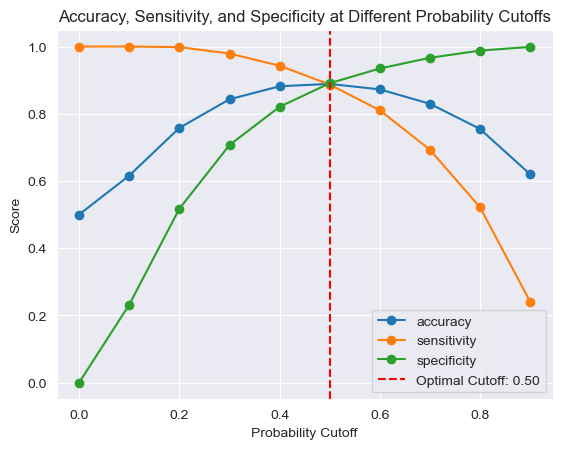

In [196]:
# Plot accuracy, sensitivity, and specificity
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'], marker='o')

# Improve visualization
plt.xlabel("Probability Cutoff")
plt.ylabel("Score")
plt.title("Accuracy, Sensitivity, and Specificity at Different Probability Cutoffs")
# Highlight the optimal cutoff point
cutoff_df['youden_index'] = cutoff_df['sensitivity'] + cutoff_df['specificity'] - 1
optimal_cutoff = cutoff_df.loc[cutoff_df['youden_index'].idxmax(), 'prob']
plt.axvline(optimal_cutoff, color='red', linestyle='--', label=f'Optimal Cutoff: {optimal_cutoff:.2f}')

plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

#### Based on the above curve we can observe that 0.50 is the optimum point to take it as cutoff prob

In [198]:
#apply cutoff probability
y_train_predrf_final['final_predicted'] = y_train_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.50 else 0)
#lets predict on train dataset with optimal cutoff probability
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_resam, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.50 else 0)
y_train_predrf_final.head()

Churn  Churn_Prob  predicted
0      0    0.188897          0
1      0    0.806197          1
2      0    0.178355          0
3      0    0.207971          0
4      0    0.096927          0

In [199]:
# Generate confusion matrix
confusion = confusion_matrix(y_train_predrf_final['Churn'], y_train_predrf_final['predicted'])

# Extract values from the confusion matrix
TN, FP, FN, TP = confusion.ravel()

# Calculate various scores
roc_auc = roc_auc_score(y_train_predrf_final['Churn'], y_train_predrf_final['predicted'])
precision = precision_score(y_train_predrf_final['Churn'], y_train_predrf_final['predicted'])
recall = TP / (TP + FN)  # Sensitivity
specificity = TN / (TN + FP)
false_positive_rate = FP / (TN + FP)
positive_predictive_value = TP / (TP + FP)
negative_predictive_value = TN / (TN + FN)

# Print all scores in a structured format
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Sensitivity/Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"Positive Predictive Value: {positive_predictive_value:.4f}")
print(f"Negative Predictive Value: {negative_predictive_value:.4f}")

ROC AUC Score: 0.8887
Precision Score: 0.8902
Sensitivity/Recall: 0.8868
Specificity: 0.8907
False Positive Rate: 0.1093
Positive Predictive Value: 0.8902
Negative Predictive Value: 0.8872


In [200]:
# Predict probabilities on test dataset
y_test_predrf = rf_pca.predict_proba(X_test_pca)[:, 1]

# Create DataFrame with actual and predicted probabilities
y_test_predrf_final = pd.DataFrame({
    'Churn': y_test, 
    'Churn_Prob': y_test_predrf
})

# Apply optimal cutoff (assumed to be 0.50 for now)
optimal_cutoff = 0.50
y_test_predrf_final['predicted'] = (y_test_predrf_final['Churn_Prob'] > optimal_cutoff).astype(int)

# Display first few rows
y_test_predrf_final.head()

Churn  Churn_Prob  predicted
48388      0    0.330406          0
29754      0    0.063389          0
50131      0    0.140774          0
66630      0    0.388997          0
91920      0    0.472838          0

In [201]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_predrf_final['Churn'], y_test_predrf_final['predicted'])
TN, FP, FN, TP = conf_matrix.ravel()  # Unpack values directly

# Compute evaluation metrics
roc_auc = roc_auc_score(y_test_predrf_final['Churn'], y_test_predrf_final['predicted'])
precision = precision_score(y_test_predrf_final['Churn'], y_test_predrf_final['predicted'])
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
false_positive_rate = FP / (TN + FP) if (TN + FP) != 0 else 0
positive_predictive_value = TP / (TP + FP) if (TP + FP) != 0 else 0
negative_predictive_value = TN / (TN + FN) if (TN + FN) != 0 else 0

# Print results
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Sensitivity/Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"Positive Predictive Value: {positive_predictive_value:.4f}")
print(f"Negative Predictive Value: {negative_predictive_value:.4f}")

ROC AUC Score: 0.8099
Precision Score: 0.3202
Sensitivity/Recall: 0.7504
Specificity: 0.8694
False Positive Rate: 0.1306
Positive Predictive Value: 0.3202
Negative Predictive Value: 0.9770


#### Logistic Regression:

    Train:
        Sensitivity/Recall: 85%
    Test:
        Sensitivity/Recall: 85%

#### Random Forest:

    Train:
        Sensitivity/Recall: 88%
    Test:
        Sensitivity/Recall: 75%

In [202]:
# Let's find the final model

# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=80)

In [203]:
# fit
rfc.fit(X_train_resam,y_train_resam)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=100,
                       min_samples_split=100, n_estimators=80)

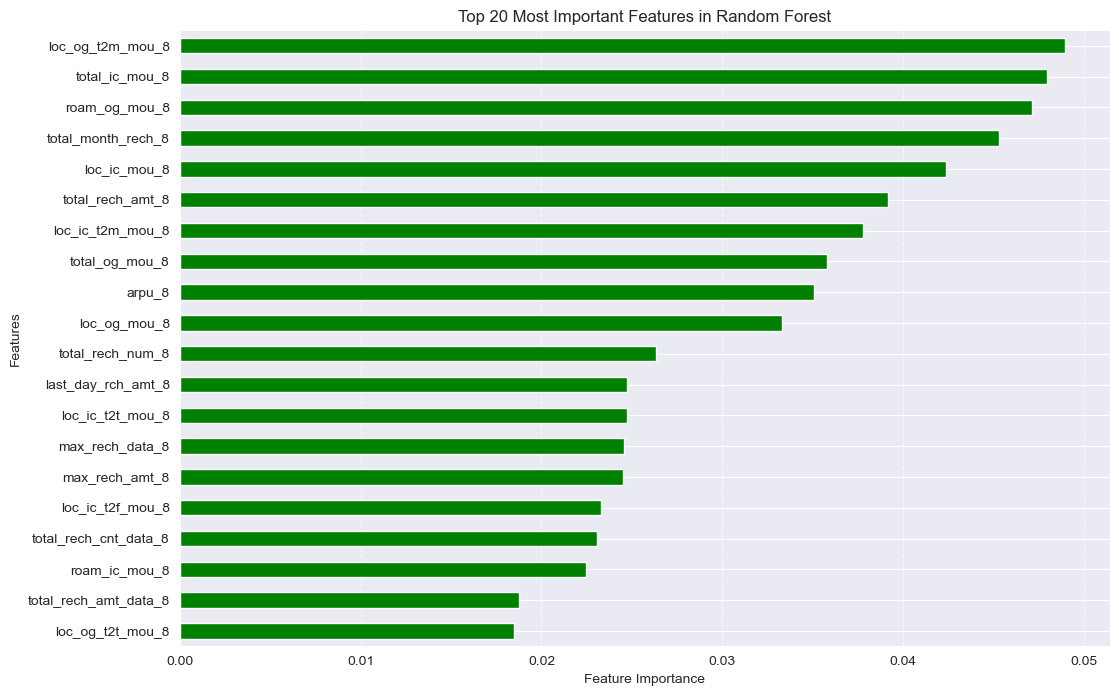

In [210]:
# Set figure size for better visualization
plt.figure(figsize=(12, 8))

# Extract and sort feature importances
impo_features = pd.Series(rfc.feature_importances_, index=X.columns)
top_features = impo_features.nlargest(20).sort_values()

# Plot feature importances as a horizontal bar chart
top_features.plot(kind='barh', align='center', color='green')

# Add labels and title
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 20 Most Important Features in Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Based on the feature importance plot , the Top 5 most important features in Random Forest model are:

    > loc_og_t2m_mou_8 – Outgoing local calls (tower-to-mobile) in August
    > total_ic_mou_8 – Total incoming call minutes of usage in August
    > roam_og_mou_8 – Outgoing roaming call minutes in August
    > total_month_rech_8 – Total monthly recharge amount in August
    > loc_ic_mou_8 – Local incoming call minutes in August


### Interpretation:

    These features strongly influence the prediction of customer churn. High values in outgoing/incoming call usage and
    recharges suggest engagement, while lower values may indicate potential churn. Roaming call usage might be a key 
    indicator of active users. Recharge amount is crucial—low recharge may signal churn risk.


<b>Recharge & Usage Patterns Matter</b>:

    total_month_rech_8 (Total Monthly Recharge, August) and total_rech_amt_8 (Total Recharge Amount, August):
    
        Higher recharge amounts may indicate more engaged users who are less likely to churn.

    last_day_rch_amt_8</b> (Last Day Recharge Amount, August):
    
        A crucial factor—customers making last-minute recharges might be at risk of churning.

#### Data & Internet Usage Factors:

    max_rech_data_8 (Maximum Data Recharge, August) and total_rech_amt_data_8 (Total Data Recharge Amount, August)
        > Users with low data recharges might be switching to competitors offering better data plans.

#### Behavioral Indicators:

    arpu_8 (Average Revenue Per User, August):
        Higher ARPU customers are often more valuable, and their behavior can indicate potential churn.
    fb_user_8 (Facebook Usage, August) :
        If a user stops using social media data services, they might be disengaging from the telecom service.



The model successfully identifies churn indicators, mainly call usage, recharge behavior, and data consumption. A focused retention strategy on these customer segments can help reduce churn and maximize revenue.